![alt text](download.png)




![alt text](download-1.png)
![alt text](download-2.png)


![alt text](download-3.png)

__Imports__

In [815]:
import numpy as np              #Standardbibliothek für mathematische Berechnungen mit Arrays und Matrizen
#np.array([...])	erstellt ein numerisches Array
#np.linspace(a, b, n)	erzeugt n gleichmäßig verteilte Werte zwischen a und b
#np.exp(x)	berechnet e hoch x (Exponentialfunktion)
#np.log(x)	berechnet den natürlichen Logarithmus
#np.mean(x)	Mittelwert
#np.std(x)	Standardabweichung

import matplotlib.pyplot as plt #Plots, Achsen, Linien, Punkte, Legenden usw.
#plt.plot(x, y)	Zeichnet eine Linie
#plt.scatter(x, y)	Zeichnet Punkte
#plt.xlabel("Text")	Beschriftet die x-Achse
#plt.ylabel("Text")	Beschriftet die y-Achse
#plt.title("Titel")	Fügt dem Plot einen Titel hinzu
#plt.legend()	Zeigt die Legende an
#plt.grid(True)	Gitterlinien einblenden
#plt.show()	Zeigt den Plot im Fenster an
#plt.figure(figsize=(8,4))	Erstellt ein neues Plotfenster mit bestimmter Größe

#plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
#dass alles schön sichtbar bleibt

__Konverter__

In [816]:
#Konverter für Dezimalzahlen, bei denen das Trennzeichen ein Komma ist
def conv(x):
    return float(x.replace(',', '.'))

__Plottfunktionen__

In [817]:
def plottstart():
     plt.figure(figsize=(8,4))           #neuer Plott
     
def plottend(ueberschrift, xlabel, ylabel):
     # doppelte label vermeiden------------------------------------------
     # plt.getCurentAxes()
     #   Gibt die aktuelle Achse (das aktuelle Diagramm) zurück, auf der man zeichnet
     #   Rückgabe Objekt vom Typ matplotlib.axes._axes.Axes
     # .get_legend_handles_labels() liefert zwei Listen zurück: handles, labels
     handles, labels = plt.gca().get_legend_handles_labels()
     # zip(labels, handles) verbindet beide Listen paarweise: 
     #   [("Messpunkte", obj1), ("Messpunkte", obj2), ("Kennlinie", obj3)]
     # durch dict() wird das zu einem Dictionary umgewandelt: 
     #   doppelte Schlüssel („Messpunkte“) werden automatisch überschrieben,
     #   es bleibt nur ein Eintrag pro Label übrig
     by_label = dict(zip(labels, handles))
     # plt.legend(by_label.values(), by_label.keys()) Zeigt jetzt die Legende ohne doppelte Einträge an
     #.values = Plot-Objekte
     #.keys = Textbeschriftung
     plt.legend(by_label.values(), by_label.keys())
     #---------------------------------------------------------------
     plt.title(f"Oszilloskop-Messung {ueberschrift}")
     #Achsenbeschriftung
     plt.xlabel(f"{xlabel}")
     plt.ylabel(f"{ylabel}")
     plt.grid(True)
     plt.legend(loc='upper right')   #legende oben rechts
     #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
     #dass alles schön sichtbar bleibt
     plt.tight_layout()
     plt.show()

In [818]:
def datenAusEinerCsvDateiAuslesen(dateiname):
    data = np.genfromtxt(
        dateiname,              # Path zur Datei (Endung .csv)
        delimiter=';',                  # Zeilen Getrennt durch Semikolon
        skip_header=1000,               # erste 1000 Zeilen überspringen
        converters={0: conv, 1: conv},  # Nach dem vorhin festgelegten Konverter , durch . ersetzen
                                        # In beiden Spalten
        autostrip=True,                 # entfernt Leerzeichen um Werte herum
        max_rows = 200                  # Stichprobengröße ist 200
    )
    
    # Zeit und Spannung extrahieren (t und u sind np arrays)
    t = np.abs(data[:, 0])      # erste Spalte: Zeit
    u = data[:, 1]              # zweite Spalte: Spannung
    return t, u


In [819]:
def mittelUndEmpStdRechnen(t,u):
    # Mittelwert 
    spannungMittelwert = np.mean(u)  #sum(u)/len(u)
    
    # Standardabweichung
    standardAbweichungU = np.std(u)
    
    # Empirische Standardabweichung
    emstandardAbweichungU  = np.std(u, ddof=1)      # ddof=1 → delta degrees of freedom = 1
                                                    # ddof=1 bedeutet: teile durch n-1 => emp std
    return t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU
    

In [820]:
def auslesenUndRechnen(dateiname):
    t,u = datenAusEinerCsvDateiAuslesen(dateiname=dateiname)
    t, u, uMittelwert, stdU, emstdU = mittelUndEmpStdRechnen(t,u)
    return t, u, uMittelwert, stdU, emstdU

In [821]:
t, u, uMittelwert, stdU, emstdU = auslesenUndRechnen(f"Versuch1_10cm.csv")

In [822]:
def originalCsvPlott(ueberschrift, t, u,uMittelwert, stdU, emstdU):
    # daten plotten
    plottstart()
    #plott
    
    plt.plot(t, u, label='Signal', color='blue')
    # Mittelwert-Linie 
    # plt.axhline() gehört zu Matplotlib
    # und wird verwendet, um eine horizontale Linie in ein Diagramm zu zeichnen.
    plt.axhline(uMittelwert, 
                color='green', 
                linestyle='--', 
                label=f'Mittelwert = {uMittelwert:.3f} V')
    # Standardabweichungslinien
    plt.axhline(uMittelwert + stdU, 
                color='red', 
                linestyle='-', 
                label=f'std +1σ = {uMittelwert + stdU:.3f} V')
    plt.axhline(uMittelwert - stdU, 
                color='red', 
                linestyle='-', 
                label=f'std -1σ = {uMittelwert - stdU:.3f} V')
    
    # empirischeStandardabweichungslinien
    plt.axhline(uMittelwert + emstdU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd +1σ = {uMittelwert + emstdU:.3f} V')
    plt.axhline(uMittelwert - emstdU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd -1σ = {uMittelwert - emstdU:.3f} V')
    
    plottend(ueberschrift, "Zeit [s]", "Spannung [V]")

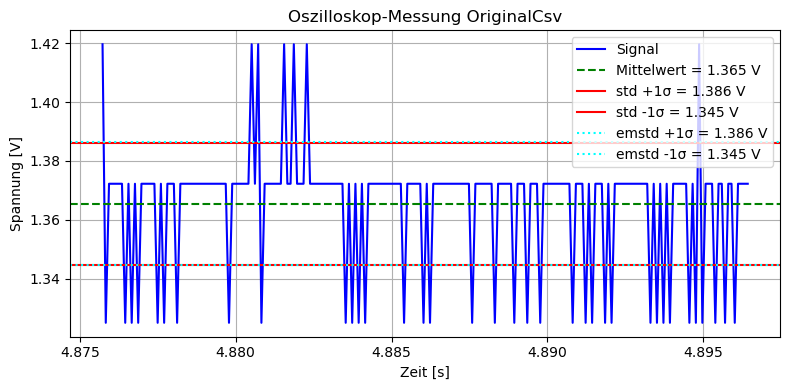

In [823]:
originalCsvPlott("OriginalCsv", t, u,uMittelwert, stdU, emstdU)

![alt text](download-4.png)

In [824]:
def verarbeiteAlleCmDateien():
    cmArr = []
    uArr = []
    uMittArr = []
    emstdUArr = []
    for i in range(10, 71, 3): cmArr.append(i)
    
    for cm in cmArr:
        t, u, uMittelwert, stdU, emstdU = auslesenUndRechnen(f"Versuch1_{cm}cm.csv")
        uArr.append(u)
        uMittArr.append(uMittelwert)
        emstdUArr.append(emstdU)
    return cmArr, uArr, uMittArr, emstdUArr

In [825]:
handmesswerte   = [1.364, 1.188, 1.071, 0.971, 0.875, 0.812, 
                   0.752, 0.696, 0.656, 0.614, 0.576, 0.533,
                   0.534, 0.518, 0.497, 0.494, 0.476, 0.458,
                   0.452, 0.433, 0.414]


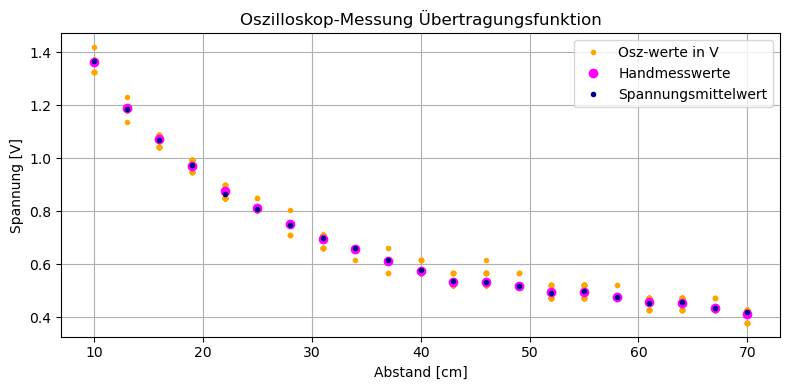

In [826]:
def uebertragsfunktionPlott(ueberschrift, handmesswerte):
    plottstart()
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
    for i in range(len(cmArr)):
        for j in range(len(uArr)):
            #Nur im ersten Durchlauf label anhängen (plott Punktwolke originalwerte)
            if(j==0 and cmArr[i]==10):        
                plt.plot(cmArr[i], uArr[i][j], ".", color = "orange", label = 'Osz-werte in V')      
            else:
                plt.plot(cmArr[i], uArr[i][j], ".", color = "orange") 
        
        if (i==0):
            plt.plot(cmArr[i], handmesswerte[i], "o", color="magenta",label='Handmesswerte')
            plt.plot(cmArr[i], uMittArr[i],".", color='darkblue', label='Spannungsmittelwert')
            #plt.plot(cm, uM-emstd,".", color='orange', label=f"emstd -1σ: {(uM-stdu):.3f}") 
        else:    
            plt.plot(cmArr[i], handmesswerte[i], "o", color="magenta")
            plt.plot(cmArr[i], uMittArr[i],".", color='darkblue')
            #plt.plot(cm, uM-emstd,".", color='orange')
    
    plottend(ueberschrift, "Abstand [cm]", "Spannung [V]")
uebertragsfunktionPlott("Übertragungsfunktion", handmesswerte=handmesswerte)

![alt text](download-5.png)
![alt text](download-6.png)

In [827]:
def logarythmier(eingang,ausgang):
    xArr=eingang
    yArr=ausgang
    logXArr =[]
    logYArr =[]
    for x in xArr:logXArr.append(np.log(x))
    for y in yArr:logYArr.append(np.log(y))
    return logXArr, logYArr

In [828]:
def logAllCm():   
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
    logXArr, logYArr = logarythmier(eingang= uArr, ausgang= cmArr)
    return logXArr, logYArr

In [829]:
def plottlogAllcm(optionalOriginal=0):
    plottstart()
    logXArr, logYArr =logAllCm()
    for i in range(len(logYArr)):
        xWerte = logXArr[i]
        yWert = logYArr[i]
        for j in range(len(logXArr[i])):
            if(i==0 and j==0):
                plt.plot(xWerte[j], yWert, ".", color="orange", label= 'logarythmiert')
            else:
                plt.plot(xWerte[j], yWert, ".", color="orange")
    
    if(optionalOriginal==1):
        #optional original dazu
        cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
        for i in range(len(logYArr)):
            xWerte = uArr[i]
            yWert = cmArr[i]
            for j in range(len(uArr[i])):
                if(i==0 and j==0):
                    plt.plot(xWerte[j], yWert, ".", color="black", label= 'original')
                else:
                    plt.plot(xWerte[j], yWert, ".", color="black")
    
    plottend("Logarythmus Aller CM Dateien","x'","y'")

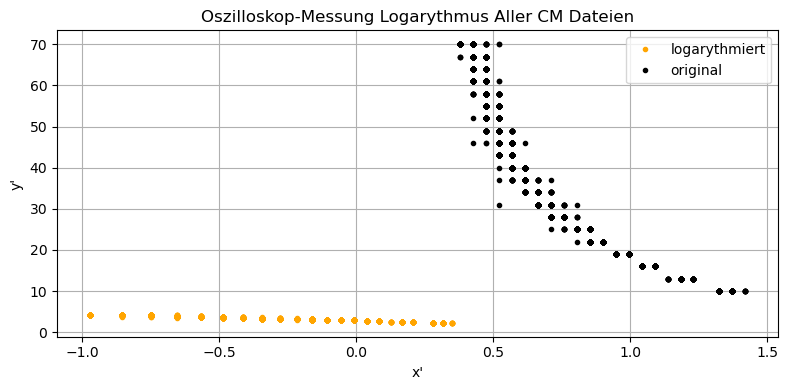

In [830]:
plottlogAllcm(1)

![alt text](download-7.png)
![alt text](download-8.png)

In [831]:
def lineareRegression(eingangU, ausgangCm):
    eingangU = np.array(eingangU, dtype=float)
    ausgangCm = np.array(ausgangCm, dtype=float)
    # Mittelwerte berechnen
    allgemeinerXmitt = np.mean(eingangU)
    yMitt = np.mean(ausgangCm)
    
    # Summen bilden
    summ_oben = np.sum((eingangU - allgemeinerXmitt) * (ausgangCm - yMitt))   # Summe über dem Bruchstrich bei der Berechnung von a
    summ_unten = np.sum((eingangU - allgemeinerXmitt)**2)             # Summe unter dem Bruchstrich bei der Berechnung von a

    # Regression
    a = summ_oben / summ_unten              # Berechnung von a
    b = yMitt - a * allgemeinerXmitt                         # Berechnung von b

    # Ausgabe der Regressionsparameter
    print(f"a = {a:.4f}, b = {b:.4f}")                      
    print(f"Potenzfunktion: y = e^{b:.4f} * x^{a:.4f}")     

    # Ausgleichsgerade plotten
    geradeY = a * eingangU + b
    
    return eingangU, ausgangCm, geradeY, a, b

In [832]:
def lineareRegressionAufDatei(dateiname=""):
    if (dateiname == ""):
        cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien()
        eingangU, ausgangCm, geradeY, a, b =lineareRegression(uMittArr, cmArr)
    #else:
     #   t, u, uMittelwert, stdU, emstdU = auslesenUndRechnen(dateiname)
      #  lineareRegression(u, )
    return eingangU, ausgangCm, geradeY, a, b, uArr

In [833]:
def plottRegression(eingangU, ausgangV, geradeY,a, b, uArr):
    plottstart()
    # Punktwolke (alle log(U) gegen log(cm))
    for i in range(len(ausgangV)):
        xWerte = uArr[i]
        yWert = np.full_like(xWerte, ausgangV[i])
        plt.plot(xWerte, yWert, ".", color="orange", 
                 label="Messpunkte (log)" if i == 0 else "")

    # Regressionsgerade
    plt.plot(eingangU, geradeY, "-", label=f"Ausgleichsgerade (y'={b:.2f}+{a:.2f}*x')", color="green")
    plottend("Lineare Regression", "log(U)", "log(cm)")

a = -63.6219, b = 83.6046
Potenzfunktion: y = e^83.6046 * x^-63.6219


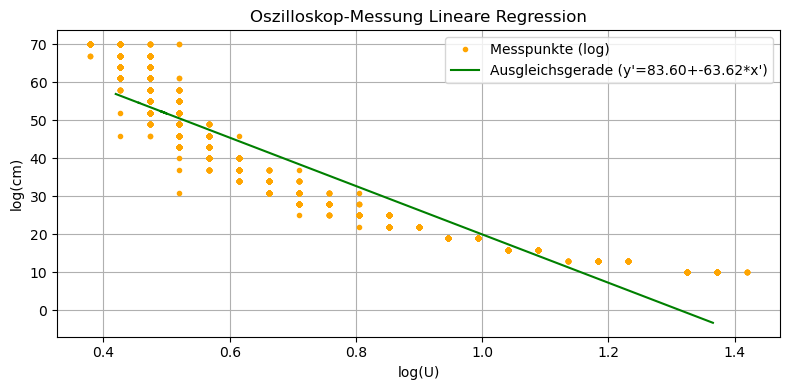

In [834]:
eingangU, ausgangV, geradeY,a, b, uArr= lineareRegressionAufDatei()
plottRegression(eingangU, ausgangV, geradeY,a, b, uArr)

![alt text](download-9.png)

In [ ]:
# Umkehrung bzw Rückrechnung der doppelten Logarithmierung
def rueckrechnung(eingangU, a, b):
    cmArr, uArr, uMittArr, emstdUArr = verarbeiteAlleCmDateien
    y = np.exp(b) * (eingangU ** a)
    return eingangU, y, cmArr


In [836]:
def plottrueckrechnung(eingangU, y, a, b):
    plottstart()
    # erstellen 300 gleichmäßiger x-Werte für einen glatten Plott (sonst zackig und teils mehrfach)
    x_fit = np.linspace(min(eingangU), max(eingangU), 300)    
    
    # y-Wert für all diese Werte
    y_fit = np.exp(b) * (x_fit ** a)
    sumXall =0
    sumY=0
    # Beispielausgabe einiger Rückrechnungen
    for i in range(0,len(eingangU)):
        sumXall = sumXall + eingangU[i]
        sumY = sumY + y[i]
    print(f"Für {sumXall/len(eingangU):.3f} Ergebnis: {sumY/len(y):.3f}")
    
    # plott Messpunkte
    plt.plot(eingangU, y, ".", color='blue', label="Messpunkte")
    
    # Ausgleichsgerade Pünktchen und gerade
    plt.plot(eingangU, y, ".", label=f"Ausgleich (y={b:.2f}+{a:.2f}*x)", color="cyan")
    plt.plot(x_fit, y_fit, "-", label=f"Ausgleich (y={b:.2f}+{a:.2f}*x)", color="cyan")
    
    plottend("Rückrechnung", "Spannung [v]", "Abstand [cm]")

a = -63.6219, b = 83.6046
Potenzfunktion: y = e^83.6046 * x^-63.6219
Für 0.685 Ergebnis: 110763806673406332586961219382045417991662748459017533652992.000


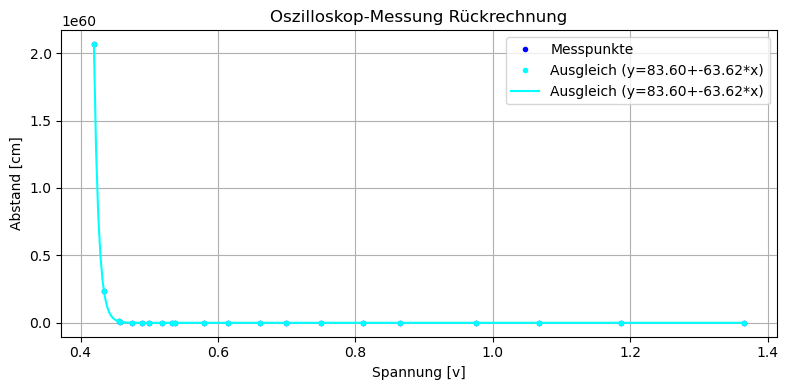

In [ ]:
eingangU, ausgangV, geradeY,a, b, uArr= lineareRegressionAufDatei()
eingangU, y = rueckrechnung(eingangU,a, b)
plottrueckrechnung(eingangU, y, a, b)
